# 13. Histogram Specification

In [1]:
import numpy as np
import pandas as pd
import cv2
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
def histogram_equalization(data, L):
    
    total_sum= np.sum(data[:, 1])
    cdf= 0
    table= []
    for row in data:
        pdf= row[1]/total_sum
        cdf+= pdf
        r= list(row)
        r.extend([pdf, cdf, round(cdf*(L-1), 0)])
        table.append(r)
    table= np.array(table)
    
    df= pd.DataFrame(table, columns= ['Gray Levels', 'No. of pixels', 'PDF', 'CDF', '(L-1)*CDF'])
    
    new_data= [0 for i in range(L)]
    for i in range(len(data)):
        new_data[int(table[i,4])]+= data[i, 1]
    
    hist_data=[]
    for i in range(L):
        hist_data.append([i, new_data[i]])
    hist_data= np.array(hist_data)
    
    return df, hist_data

In [3]:
def histogram_specification(data, c1, c2):
    D= []
    for i in range(len(c1)):
        for j in range(len(c2)):
            if c2[j]>= c1[i]:
                D.append(data[j, 0])
                break
    df= pd.DataFrame(np.array([data[:, 0], c1, c2, D]).T, columns= ['c0', 'c1', 'c2', 'D'])
    
    new_data= [0 for i in range(len(c1))]
    for i in range(len(data)):
        new_data[int(D[i])]+= data[i, 1]
    
    hist_data=[]
    for i in range(len(c1)):
        hist_data.append([i, new_data[i]])
    hist_data= np.array(hist_data)
    
    return df, hist_data

# User Data

In [4]:
# ip_data= []
# n= int(input("Enter no. of gray levels: "))
# for i in range(n):
#     gray_lvl, nos= map(int, input('Enter gray level and no. of pixel: ').split())
#     ip_data.append([gray_lvl, nos])
# ip_data= np.array(ip_data)

n= 8
ip_data= np.array([[0, 8],
 [1, 10],
 [2, 10],
 [3, 2],
 [4, 12],
 [5, 16],
 [6, 4],
 [7, 2]])

In [5]:
# des_data= []
# for i in range(n):
#     gray_lvl, nos= map(int, input('Enter gray level and no. of pixel: ').split())
#     des_data.append([gray_lvl, nos])
# des_data= np.array(des_data)

n= 8
des_data= np.array([[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 20],
 [5, 20],
 [6, 16],
 [7, 8]])

In [6]:
ip_df, ip_hist_data= histogram_equalization(ip_data, n)

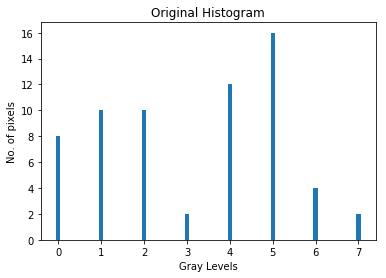

In [7]:
plt.bar(ip_data[:, 0], ip_data[:, 1], width= 0.1)
plt.title('Original Histogram')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

In [8]:
ip_df.head(n)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,8.0,0.12500,0.12500,1.0
1,1.0,10.0,0.15625,0.28125,2.0
2,2.0,10.0,0.15625,0.43750,3.0
3,3.0,2.0,0.03125,0.46875,3.0
4,4.0,12.0,0.18750,0.65625,5.0
5,5.0,16.0,0.25000,0.90625,6.0
6,6.0,4.0,0.06250,0.96875,7.0
7,7.0,2.0,0.03125,1.00000,7.0


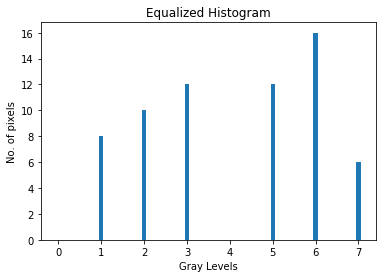

In [9]:
plt.bar(ip_hist_data[:, 0], ip_hist_data[:, 1], width= 0.1)
plt.title('Equalized Histogram')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

In [10]:
des_df, des_hist_data= histogram_equalization(des_data, n)

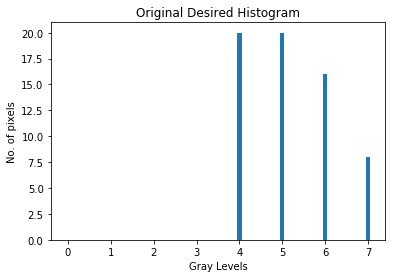

In [11]:
plt.bar(des_data[:, 0], des_data[:, 1], width= 0.1)
plt.title('Original Desired Histogram')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

In [12]:
des_df.head(n)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,0.0,0.0000,0.0000,0.0
1,1.0,0.0,0.0000,0.0000,0.0
2,2.0,0.0,0.0000,0.0000,0.0
3,3.0,0.0,0.0000,0.0000,0.0
4,4.0,20.0,0.3125,0.3125,2.0
5,5.0,20.0,0.3125,0.6250,4.0
6,6.0,16.0,0.2500,0.8750,6.0
7,7.0,8.0,0.1250,1.0000,7.0


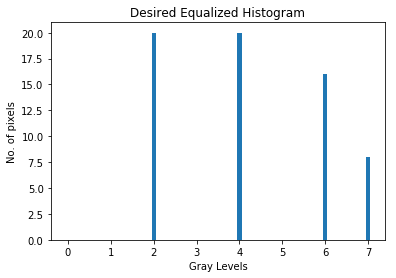

In [13]:
plt.bar(des_hist_data[:, 0], des_hist_data[:, 1], width= 0.1)
plt.title('Desired Equalized Histogram')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

In [14]:
sp_df, sp_hist_data= histogram_specification(ip_data, ip_df.loc[:, '(L-1)*CDF'], des_df.loc[:, '(L-1)*CDF'])

In [15]:
sp_df.head(n)

,c0,c1,c2,D
0,0.0,1.0,0.0,4.0
1,1.0,2.0,0.0,4.0
2,2.0,3.0,0.0,5.0
3,3.0,3.0,0.0,5.0
4,4.0,5.0,2.0,6.0
5,5.0,6.0,4.0,6.0
6,6.0,7.0,6.0,7.0
7,7.0,7.0,7.0,7.0


In [16]:
sp_hist_data

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4, 18],
       [ 5, 12],
       [ 6, 28],
       [ 7,  6]])

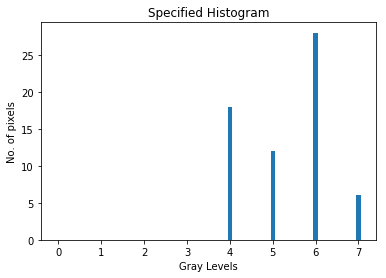

In [17]:
plt.bar(sp_hist_data[:, 0], sp_hist_data[:, 1], width= 0.1)
plt.title('Specified Histogram')
plt.xlabel('Gray Levels')
plt.ylabel('No. of pixels')
plt.show()

# Image

In [18]:
def img2data(img, L):
    count= dict(Counter(img.ravel()))
    data_img= []
    for i in range(L):
        try:
            data_img.append([i, count[i]])
        except:
            data_img.append([i, 0])
    data_img= np.array(data_img)
    return data_img

In [19]:
ip1= input('Enter image name: ')
ip2= input('Enter desired image: ')

ip_img= cv2.imread(ip1)
des_img= cv2.imread(ip2)
ip_img= cv2.cvtColor(ip_img,cv2.COLOR_BGR2RGB)
des_img= cv2.cvtColor(des_img,cv2.COLOR_BGR2RGB)
ip_img.shape, des_img.shape

Enter image name: ./Images/day.png
Enter desired image: ./Images/night.png


((480, 640, 3), (480, 640, 3))

In [20]:
n= 256
ip_img0= ip_img[:, :, 0]
ip_img1= ip_img[:, :, 1]
ip_img2= ip_img[:, :, 2]

des_img0= des_img[:, :, 0]
des_img1= des_img[:, :, 1]
des_img2= des_img[:, :, 2]

In [21]:
ip_data0= img2data(ip_img0, 256)
ip_data1= img2data(ip_img1, 256)
ip_data2= img2data(ip_img2, 256)

In [22]:
des_data0= img2data(des_img0, 256)
des_data1= img2data(des_img1, 256)
des_data2= img2data(des_img2, 256)

In [23]:
ip_df0, ip_hist_data0= histogram_equalization(ip_data0, n)
ip_df1, ip_hist_data1= histogram_equalization(ip_data1, n)
ip_df2, ip_hist_data2= histogram_equalization(ip_data2, n)

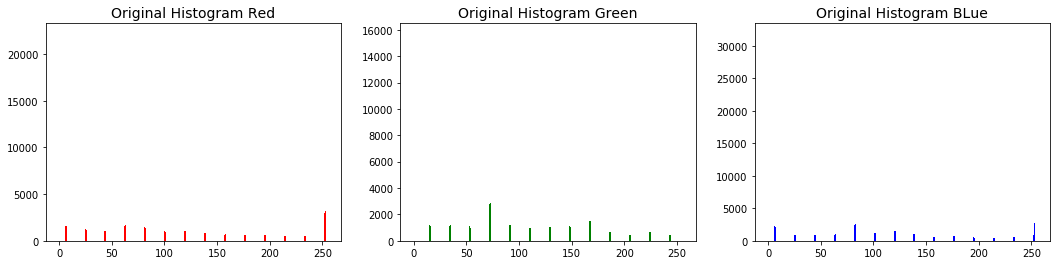

In [24]:
fig, ax= plt.subplots(ncols= 3, figsize= (18, 4))
fsize= 14

ax[0].set_title("Original Histogram Red", fontsize= fsize)
ax[0].bar(ip_data0[:, 0], ip_data0[:, 1], width= 0.1, color='red')

ax[1].set_title("Original Histogram Green", fontsize= fsize)
ax[1].bar(ip_data1[:, 0], ip_data1[:, 1], width= 0.1, color='green')

ax[2].set_title("Original Histogram BLue", fontsize= fsize)
ax[2].bar(ip_data2[:, 0], ip_data2[:, 1], width= 0.1, color='blue')

plt.show()

In [25]:
ip_df0.head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,18876.0,0.061445,0.061445,16.0
1,1.0,4586.0,0.014928,0.076374,19.0
2,2.0,2458.0,0.008001,0.084375,22.0
3,3.0,2350.0,0.007650,0.092025,23.0
4,4.0,2088.0,0.006797,0.098822,25.0
5,5.0,1745.0,0.005680,0.104502,27.0
6,6.0,1607.0,0.005231,0.109733,28.0
7,7.0,1631.0,0.005309,0.115042,29.0
8,8.0,1440.0,0.004687,0.119730,31.0
9,9.0,1338.0,0.004355,0.124085,32.0


In [26]:
ip_df1.head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,15700.0,0.051107,0.051107,13.0
1,1.0,4472.0,0.014557,0.065664,17.0
2,2.0,3000.0,0.009766,0.075430,19.0
3,3.0,2309.0,0.007516,0.082946,21.0
4,4.0,1982.0,0.006452,0.089398,23.0
5,5.0,1766.0,0.005749,0.095146,24.0
6,6.0,1689.0,0.005498,0.100645,26.0
7,7.0,1588.0,0.005169,0.105814,27.0
8,8.0,1475.0,0.004801,0.110615,28.0
9,9.0,1451.0,0.004723,0.115339,29.0


In [27]:
ip_df2.head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,31877.0,0.103766,0.103766,26.0
1,1.0,4449.0,0.014482,0.118249,30.0
2,2.0,4469.0,0.014548,0.132796,34.0
3,3.0,3116.0,0.010143,0.142939,36.0
4,4.0,3061.0,0.009964,0.152904,39.0
5,5.0,2587.0,0.008421,0.161325,41.0
6,6.0,2293.0,0.007464,0.168789,43.0
7,7.0,2062.0,0.006712,0.175501,45.0
8,8.0,1936.0,0.006302,0.181803,46.0
9,9.0,1815.0,0.005908,0.187712,48.0


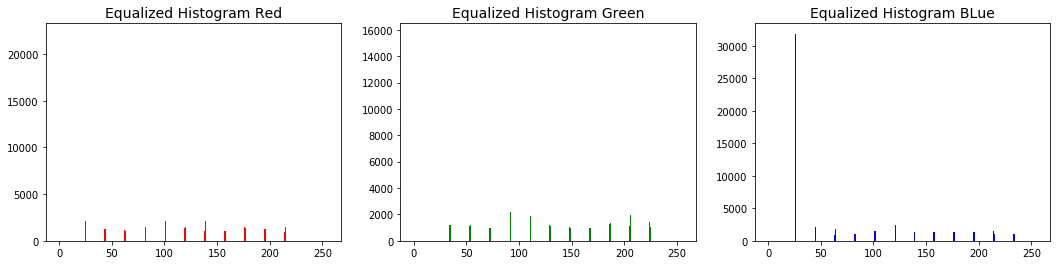

In [28]:
fig, ax= plt.subplots(ncols= 3, figsize= (18, 4))
fsize= 14

ax[0].set_title("Equalized Histogram Red", fontsize= fsize)
ax[0].bar(ip_hist_data0[:, 0], ip_hist_data0[:, 1], width= 0.1, color='red')

ax[1].set_title("Equalized Histogram Green", fontsize= fsize)
ax[1].bar(ip_hist_data1[:, 0], ip_hist_data1[:, 1], width= 0.1, color='green')

ax[2].set_title("Equalized Histogram BLue", fontsize= fsize)
ax[2].bar(ip_hist_data2[:, 0], ip_hist_data2[:, 1], width= 0.1, color='blue')

plt.show()

In [29]:
des_df0, des_hist_data0= histogram_equalization(des_data0, n)
des_df1, des_hist_data1= histogram_equalization(des_data1, n)
des_df2, des_hist_data2= histogram_equalization(des_data2, n)

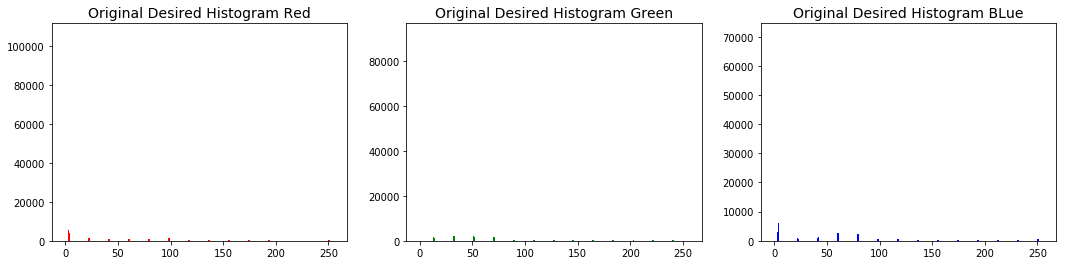

In [30]:
fig, ax= plt.subplots(ncols= 3, figsize= (18, 4))
fsize= 14

ax[0].set_title("Original Desired Histogram Red", fontsize= fsize)
ax[0].bar(des_data0[:, 0], des_data0[:, 1], width= 0.1, color='red')

ax[1].set_title("Original Desired Histogram Green", fontsize= fsize)
ax[1].bar(des_data1[:, 0], des_data1[:, 1], width= 0.1, color='green')

ax[2].set_title("Original Desired Histogram BLue", fontsize= fsize)
ax[2].bar(des_data2[:, 0], des_data2[:, 1], width= 0.1, color='blue')

plt.show()

In [31]:
des_df0.head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,106414.0,0.346400,0.346400,88.0
1,1.0,18344.0,0.059714,0.406113,104.0
2,2.0,7814.0,0.025436,0.431549,110.0
3,3.0,5529.0,0.017998,0.449548,115.0
4,4.0,3807.0,0.012393,0.461940,118.0
5,5.0,2963.0,0.009645,0.471585,120.0
6,6.0,2577.0,0.008389,0.479974,122.0
7,7.0,2336.0,0.007604,0.487578,124.0
8,8.0,2076.0,0.006758,0.494336,126.0
9,9.0,2032.0,0.006615,0.500951,128.0


In [32]:
des_df1.head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,92262.0,0.300332,0.300332,77.0
1,1.0,15365.0,0.050016,0.350348,89.0
2,2.0,5918.0,0.019264,0.369613,94.0
3,3.0,3774.0,0.012285,0.381898,97.0
4,4.0,2934.0,0.009551,0.391449,100.0
5,5.0,2615.0,0.008512,0.399961,102.0
6,6.0,2256.0,0.007344,0.407305,104.0
7,7.0,2077.0,0.006761,0.414066,106.0
8,8.0,1917.0,0.006240,0.420306,107.0
9,9.0,1901.0,0.006188,0.426494,109.0


In [33]:
des_df2.head(10)

,Gray Levels,No. of pixels,PDF,CDF,(L-1)*CDF
0,0.0,71014.0,0.231165,0.231165,59.0
1,1.0,2859.0,0.009307,0.240472,61.0
2,2.0,13902.0,0.045254,0.285726,73.0
3,3.0,3124.0,0.010169,0.295895,75.0
4,4.0,6103.0,0.019867,0.315762,81.0
5,5.0,4618.0,0.015033,0.330794,84.0
6,6.0,2424.0,0.007891,0.338685,86.0
7,7.0,2189.0,0.007126,0.345811,88.0
8,8.0,1824.0,0.005938,0.351748,90.0
9,9.0,1626.0,0.005293,0.357041,91.0


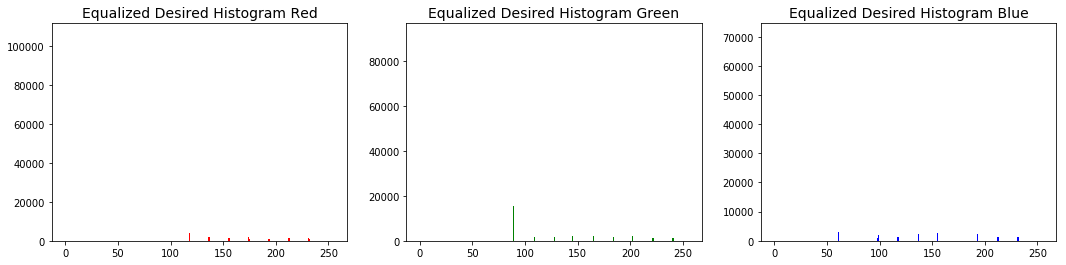

In [34]:
fig, ax= plt.subplots(ncols= 3, figsize= (18, 4))
fsize= 14

ax[0].set_title("Equalized Desired Histogram Red", fontsize= fsize)
ax[0].bar(des_hist_data0[:, 0], des_hist_data0[:, 1], width= 0.1, color='red')

ax[1].set_title("Equalized Desired Histogram Green", fontsize= fsize)
ax[1].bar(des_hist_data1[:, 0], des_hist_data1[:, 1], width= 0.1, color='green')

ax[2].set_title("Equalized Desired Histogram Blue", fontsize= fsize)
ax[2].bar(des_hist_data2[:, 0], des_hist_data2[:, 1], width= 0.1, color='blue')

plt.show()

In [35]:
sp_df0, sp_hist_data0= histogram_specification(ip_data0, ip_df0.loc[:, '(L-1)*CDF'], des_df0.loc[:, '(L-1)*CDF'])
sp_df1, sp_hist_data1= histogram_specification(ip_data1, ip_df1.loc[:, '(L-1)*CDF'], des_df1.loc[:, '(L-1)*CDF'])
sp_df2, sp_hist_data2= histogram_specification(ip_data2, ip_df2.loc[:, '(L-1)*CDF'], des_df2.loc[:, '(L-1)*CDF'])

In [36]:
sp_df0.head(10)

,c0,c1,c2,D
0,0.0,16.0,88.0,0.0
1,1.0,19.0,104.0,0.0
2,2.0,22.0,110.0,0.0
3,3.0,23.0,115.0,0.0
4,4.0,25.0,118.0,0.0
5,5.0,27.0,120.0,0.0
6,6.0,28.0,122.0,0.0
7,7.0,29.0,124.0,0.0
8,8.0,31.0,126.0,0.0
9,9.0,32.0,128.0,0.0


In [37]:
sp_df1.head(10)

,c0,c1,c2,D
0,0.0,13.0,77.0,0.0
1,1.0,17.0,89.0,0.0
2,2.0,19.0,94.0,0.0
3,3.0,21.0,97.0,0.0
4,4.0,23.0,100.0,0.0
5,5.0,24.0,102.0,0.0
6,6.0,26.0,104.0,0.0
7,7.0,27.0,106.0,0.0
8,8.0,28.0,107.0,0.0
9,9.0,29.0,109.0,0.0


In [38]:
sp_df2.head(10)

,c0,c1,c2,D
0,0.0,26.0,59.0,0.0
1,1.0,30.0,61.0,0.0
2,2.0,34.0,73.0,0.0
3,3.0,36.0,75.0,0.0
4,4.0,39.0,81.0,0.0
5,5.0,41.0,84.0,0.0
6,6.0,43.0,86.0,0.0
7,7.0,45.0,88.0,0.0
8,8.0,46.0,90.0,0.0
9,9.0,48.0,91.0,0.0


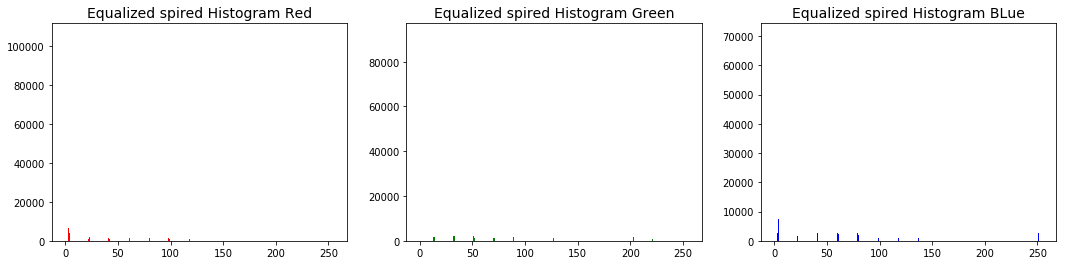

In [39]:
fig, ax= plt.subplots(ncols= 3, figsize= (18, 4))
fsize= 14

ax[0].set_title("Equalized spired Histogram Red", fontsize= fsize)
ax[0].bar(sp_hist_data0[:, 0], sp_hist_data0[:, 1], width= 0.1, color='red')

ax[1].set_title("Equalized spired Histogram Green", fontsize= fsize)
ax[1].bar(sp_hist_data1[:, 0], sp_hist_data1[:, 1], width= 0.1, color='green')

ax[2].set_title("Equalized spired Histogram BLue", fontsize= fsize)
ax[2].bar(sp_hist_data2[:, 0], sp_hist_data2[:, 1], width= 0.1, color='blue')

plt.show()

In [40]:
def data2img(img, df):
    new_img= img.copy()
    for i in range(df.shape[0]):
        new_img[img==i]= df.loc[i, 'D']
    return new_img

In [41]:
new_img0= data2img(ip_img0, sp_df0)
new_img1= data2img(ip_img1, sp_df1)
new_img2= data2img(ip_img2, sp_df2)

In [42]:
new_img= np.array([new_img0.T, new_img1.T, new_img2.T]).T

In [43]:
new_img.shape

(480, 640, 3)

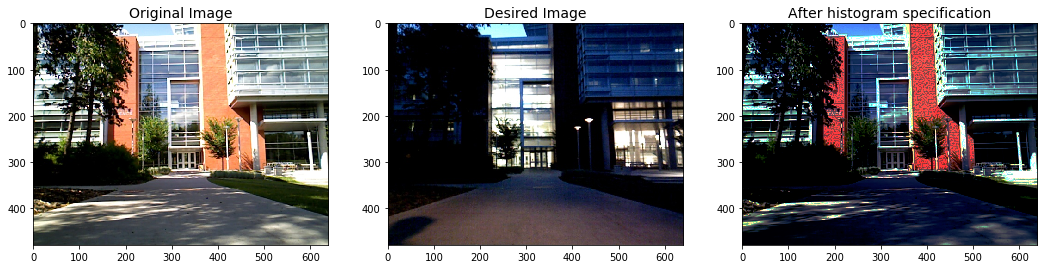

In [44]:
fig, ax= plt.subplots(ncols= 3, figsize= (18, 6))
fsize= 14

ax[0].set_title("Original Image", fontsize= fsize)
ax[0].imshow(ip_img)

ax[1].set_title("Desired Image", fontsize= fsize)
ax[1].imshow(des_img)

ax[2].set_title("After histogram specification", fontsize= fsize)
ax[2].imshow(new_img)

plt.show()